The **loss function**, also called the **cost function** is the algorithm that quantifies how wrong a model is. Loss is the measure of this metric. Since loss is the error of the model we ideally want it to be 0. We might wonder why we dont just calculate the error based on the argmax accuracy. Remember our example from earlier of confidence `[0.22, 0.6, 0.18]` vs `[0.32, 0.36, 0.32]`. If the correct class were indeed the middle one (index 1), the model accuracy would be identical between the two above. But are these two examples *really* as accurate as each other? No they are not, because accuracy is simply applying and argmax to the output to find the index of the biggest value. The output of a neural network is actually confidence, and more confidence in the correct answer is better. This is the reason we strive to increaste correct confidence and decrease misplaced confidence.

#### Categorical Cross-Entropy Loss
In linear regression there is a loss function used that is also applied in neural networks: squarred error or mean squared error with neural networks. But since we are not doing regression in our example for now we need a different loss function. Our model has a softmax activation function for the output layer, which mean it is outputting probability distribution. **Categorical cross-entropy** is explicitly used to compare a so called "ground truth" probability (y or "targets) and some predicted distribution (y-hat or "predictions"), thus it makes sense to use cross-entropy in our cae. Is is also one of the most commonly used loss functions with softmax activation on the output layer.  
  
The formula for calulating the categorical cross-entropy of y (actual/desired distribution) and y-hat(predicted distribution) is:  
Li = - sum yi,j log(^yi,j)  
where *Li* denotes the sample loss value, *i* the i-th sample in the set, *j* is the label/output index, *y* denotes the target values and *y-hat* denotes the predicted values.

When we start coding we simplify this further to *-log(correct_class_confidence)*, the formula for this is:  
Li = -log(^y, k) , where k is an index of "true" probability  
where *Li* denotes sample loss value, *i* is the i-th sample in a set, *k* is the index of the target label (ground-truth label), *y* denotes the target values and *y-hat* denotes the predicted values.  
  
We may ask ourselves why we call this cross-entropy and not **log loss**, which is also a type of loss. In general , the log loss error function is what we apply to the output of a binary logistic regression model (ch 16) - there are only two classes in the distribution, each of them applying to a single output (neuron) which is targeted as 0 or 1. In our case, we have a classification model that returns a probability distribution over all of the outputs. Cross-entropy compares two probability distributions. In our case, we have a softmax output of let´s say: 

In [1]:
softmax_output = [0.7, 0.1, 0.2]

To which probability distribution do we want to compare this to? We have 3 class confidence in the above output, let´s assume that the desired prediction is the first class (index0, which is currently 0.7). If that the intended prediciton, the desired probability distribution is `[1, 0, 0]`. The desired probablities will consist of a 1 in the desired class and a 0 in the remaining undesired classes. This type of arrays or vectors are called one-hot, "hot" is (on) with value 1 and the rest are "cold" (off) with values of 0. When comparing the model´s results to a one-hot vector using cross entropy, the other parts of the equation zero out and the target probability´s log loss is multiplied by , making cross-entropy calculation relatively simple. An example with:

In [3]:
softmax_output = [0.7, 0.1, 0.2]  
targets = [1, 0, 0]

We can do the following calculations:  
Li = - (1 * log(0.7) + 0 *log(0.1) + 0 * log(0.2)) =  
= -(-0.3566749 + 0 + 0) = 0.3566749  
  
Let´s see the Python code verion of this:

In [4]:
import math

# an example output of the output layer of the neural network
softmax_output = [0.7, 0.1, 0.2]  
# ground trugh
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0])*target_output[0] +
         math.log(softmax_output[1])*target_output[1] +
         math.log(softmax_output[2])*target_output[2])

print(loss)

0.35667494393873245


That is the full categorical cross-entropy calculation, however we can make a few assumptions given one-hot target vectors. The true values for `target_output[1]` and `taget_output[2]` are both 0 and anything multiplied by 0 is 0. So we dont need to calculate these indices. Next, what is the `target_output[0]`, is is 1 in this case. So this can be omitted as anything multiples by 1 remains the same. The same output then in this example can be calculated with:

In [5]:
loss = -math.log(softmax_output[0])
print(loss)

0.35667494393873245


We can thus make some simple assumptions and use a more basic calculation, reducing it to the negative log of the target class confidence score.  
  
The **categorical cross-entropy loss** account for that and outputs a larger loss the lower the confidence is:

In [6]:
import math

print(math.log(1.))
print(math.log(.95))
print(math.log(.9))
print(math.log(.8))
print('...')
print(math.log(0.2))
print(math.log(.1))
print(math.log(.05))
print(math.log(.01))

0.0
-0.05129329438755058
-0.10536051565782628
-0.2231435513142097
...
-1.6094379124341003
-2.3025850929940455
-2.995732273553991
-4.605170185988091


From above printed log values for a few example confidences, when the confidence level equals to 1, meaning the models is 100% "sure" about its prediciton, the loss value for this sample equals 0. The loss value rases with the confidence level, approaching 0. You might also wonder why we did not print the result of log(0), this is undefined. The `log(x)` in this book will always be the natural logarithm also known as ln(x).

[0.999 0.95  0.9   0.8   0.7   0.6   0.5   0.4   0.3   0.2   0.1   0.05
 0.01 ]
[-1.00050033e-03 -5.12932944e-02 -1.05360516e-01 -2.23143551e-01
 -3.56674944e-01 -5.10825624e-01 -6.93147181e-01 -9.16290732e-01
 -1.20397280e+00 -1.60943791e+00 -2.30258509e+00 -2.99573227e+00
 -4.60517019e+00]


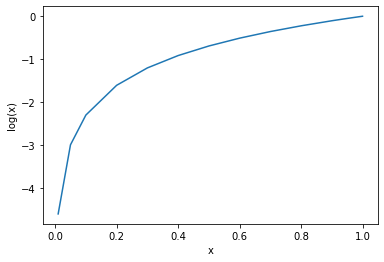

In [7]:
# OMA. Plot log of some values of x
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    #return(-math.log(x))
    return(np.log(x))

x = np.array([.999,.95,.9,.8,.7,.6,.5,.4,.3,.2,.1,.05,.01])
y = f(x)

print(x)
print(y)

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("log(x)")
plt.show()

In [8]:
# example of log
b = 5.2
print(np.log(b))

1.6486586255873816


In [9]:
# confirm this by exponantiating this result
print(math.e ** 1.6486586255873816)

# The reason for not exact match is floating point precision in Python.

5.199999999999999


Lets condsider a neural network that does classification between three classes and the network classifies in batches o.f three. After running through the softmax activation function with a batch of 3 samples and 3 clases the output layer of the network outputs

In [68]:
# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

We need a dynamic way of calculating the categorical cross-entropy, which we know is a negative log calculation. To determin which value in the softmax output to claculate the neg log from we just need to know our target values. In this example, there are 3 classes, they could be "dog", "cat", "human". A doc is class 0 at index 0, cat class 1 at index 1 and human class 2 ad index 2. Let´s assume the target values are dog, cat, cat that means the list of indices woul be `[0, 1, 1]`

In [10]:
# use a list of list first to illustrate the concept
softmax_outputs = [[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]]

class_targets = [0, 1, 1] # dog, cat, cat

First value 0 in `class_targets`means the first softmax output distribution´s intended prediciton wasthe on of the 0 index of `[0.7, 0.1, 0.2]` and the model has 0.7 confidence score this observation is a dog. Next in this batch of samples, in the second softmax distribution `[0.1, 0.5, 0.4]` was at index 2, model only has 0.5 confidence score that this is a cat, so less certain about this observation. In the last sample, is is also the 2 index from the softmax distribution a value of 0.9, so quite high confidence here. We can map softmax outputs with their intended targets to get the values from the softmax distribution.

In [11]:
for targ_idx, distribution in zip(class_targets, softmax_outputs):
    print(distribution[targ_idx])

0.7
0.5
0.9


Using `zip()` function lets us iterate over multiple iterables at the same time. But we can simplify this further using numpy instead by creating np array of the softmax outputs.

In [12]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = [0, 1, 1]

print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


The values 0,1,2, numpy lets us index an array in multiple ways. We an use a list filled with indices, we could use the `class_targets` for this purpose as it already contains the list of indices that we are interested in. One problem though is that this has to filter data rows in the array, the second dimension. To perform that, we also need to explicitly filter the array in its first dimension. This dimension contains the predicitons and we want to get them all. This we can achieve by using a list containing numbers from 0 through all of the indices. We know we have to have as many indices as distributions in our whole batch so we can use the `range()` instead of typing each value ourselves.

In [13]:
print(softmax_outputs
      [range(len(softmax_outputs)), class_targets])

[0.7 0.5 0.9]


That returns the list of confidences at the target indices for each of the samples. Now we want to apply the negative log to this list.

In [14]:
neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)),class_targets
])

print(neg_log)

# adding average loss per batch
average_loss = np.mean(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


We have also seen that targest can be one-hot encoded (OHE) where all values except one are zeros and the correct label´s position is filled with 1. They can also be sparse, which means that the numbers they contain are the correct class numbers, we are generating them in this way with the `spiral_data()` function, and we can allow the loss calculation to accept any of these forms. Since we implemented this to work with sparse labels (as in the training data) we need to add a check if they are OHE and handle this a bit differently in this new case. The check can be implemented by counting the dimensions - if targets are single-dimensional (lika a list), they are sparse, but if there are 2 dimensions (like a list of lists), then there is a set of one-hot encoded vectors. In this second case , we will implement a solution using the first equation from this chapter, instead of filtering out the confidence at the target labels. We have to multiply the confidences by the targets, zerioing out all values except the ones at correct labels, performing a sum along the row axis 1. We need to a test to the code we just wrote for the nbr of dimensions, move the calculation of the log values outside this new `if` statement and implement the solution for the OHE labels following the first equation:

In [15]:
# Oma example of lenght 

class_targets = np.array([0, 1, 1]) # categorical labels (as array, not as list)
print("categorical labels shape: ", len(class_targets.shape))

class_targets = np.array([[1, 0, 0], # OHE labels
                          [0, 1, 0],
                          [0, 1, 0]])
print("OHE labels shape: ", len(class_targets.shape))

categorical labels shape:  1
OHE labels shape:  2


In [16]:
import numpy as np

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

#class_targets = np.array([0, 1, 1])  # categorical labels  , comment out and try this one and comment out two rows below

class_targets = np.array([[1, 0, 0], # OHE labels
                          [0, 1, 0],
                          [0, 1, 0]])

# Probabilities for target values

# Only if cateogorical labels   [dog, cat, cat] , [0,1,1]
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
        range(len(softmax_outputs)),
        class_targets
    ]

# Mask values - only for OHE labels
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        softmax_outputs*class_targets,
        axis=1)

# Losses
neg_log = -np.log(correct_confidences)

average_loss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


This works, but before moving further we have an additional problem to be solved.  
The softmax output, which is input to the loss function, consists of numbers in the range from 0 to 1, a list of confidences. It is possible for the model to have full confidence for one label making all the remaining confidences zero. Also it is possible that the model will assign full confidence to a value that was not the target. If we try to calculate the loss of this confidence of 0 we get a problem:

In [105]:
print(-np.log(0))
# The log of 0 is undefined

inf


<ipython-input-105-029f64eda5e8>:1: RuntimeWarning: divide by zero encountered in log
  print(-np.log(0))


The constant `e` to any power is always a positive number, and there is no `y` resulting from e^y = 0. This means the log(0) is undefined. We can calculate the limit of a function, but to simplify we will skip the definition of that. From w approaching 0 from positive (it is impossible to calculate the natural logarithmm of a negative value) equals negative infinity. This means that the limit is negative infinity for any infinitely small x, where x never reaches 0. In programming languages we dont have limits here, just a function which, given a parameter, returns some value.

In [106]:
print(np.e**(-np.inf))

0.0


In coding, the fewer things that are undefined, the better. We will see osme similar simplifications, when calculating derivative of absolute value function, which does not exist for an input of 0 and we have to make a decision around it. As  much as the result above of -np.log(0) would make sense, since the model would be fully wrong, this will prevent us from doing further calculations. We would also have problems later in the optimization when calculating gradients, starting with a mean value of all sample-wise lsoses since a single infinite value in a list will cause the average of that list to also be infinite:

In [107]:
import numpy as np

print(np.mean([1, 2, 3, -np.log(0)]))

inf


<ipython-input-107-c7948bb5c56b>:3: RuntimeWarning: divide by zero encountered in log
  print(np.mean([1, 2, 3, -np.log(0)]))


We could **add a very small number** to the confidence to prevent it from being zero, for example 1-e7

In [108]:
print(-np.log(1e-7))

16.11809565095832


Adding a really small value, one tenth of a million, to the confidence at its far edge will have insignificant impact on the result. But will cause two problems, in the case when confidence is 1.

In [109]:
# if confidence is 1
print(-np.log(1+1e-7))

-9.999999505838704e-08


In his case, then model is fully correct in the prediction and all confidence is put on the correct in the label, the loss becomes negative instead of being 0. The other problem is here when shifting confidence towards 1, even if by a very small value. How to do that. To prevent these issues it is better to clip values from both sides by the same number, 1e-7 in this case. Meaning that the lowest possible value will be come 1e-7 and the highest value will become 1-1e-7 (slightly less than 1)

In [110]:
# This will prevent loss from being exactly 0 and making it very small instead
print(-np.log(1-1e-7))

1.0000000494736474e-07


In [ ]:
# Dont run

# we acomplish this by using np.clip()
y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

The `np.clip()` method performs clipping of an array of values, we we can apply it to the predicitons directly and save this as an separate array and use next.

**Categorical Cross-Entropy Loss Class**  
  
We will be using more loss functions going ahead, but not matter which loss function we use, the overall loss is always the mean value of all sample losses. So we can create a `loss` class that contains the `calculate` method that will call our loss object´s forward method and calculate the mean value of returned sample losses.

In [116]:
# Common loss class
class Loss:
    
    # calculate the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        
        # calculate sample losses
        sample_losses = self.forward(output, y)
        
        # calculate mean loss
        data_loss = np.mean(sample_losses)
        
        # return loss
        return data_loss

Now we convert our loss class code into a class for convenience down the line to be used here and later on:

In [117]:
# Cross entropy loss
class Loss_CategoricalCrossentropy(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        # number of samples in a batch
        samples = len(y_pred)
        
        # clip data to prevent division by 0
        # clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # probabilities for target values -
        # Only if cateogorical labels   [dog, cat, cat] , [0,1,1]
        if len(class_targets.shape) == 1:
            correct_confidences = softmax_outputs[
                range(len(softmax_outputs)),
                class_targets
            ]

        # Mask values - only for OHE labels
        elif len(class_targets.shape) == 2:
            correct_confidences = np.sum(
                softmax_outputs*class_targets,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

This class inherist the `Loss` class and performs the error calculations that we derived in this whole chapter and can be used as an object. As an example, using the manually created outputs and targets above:

In [118]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


**Combining everything up to this point**

In [17]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Dense layer
class Layer_Dense:
    
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        
# ReLu activation
class Activation_ReLU:
    
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)
        
# Softmax activation
class Activation_Softmax:
    
    # Forward pass
    def forward(self, inputs):
        
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)
        
        self.output = probabilities

# Common loss class
class Loss:
    
    # calculate the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        
        # calculate sample losses
        sample_losses = self.forward(output, y)
        
        # calculate mean loss
        data_loss = np.mean(sample_losses)
        
        # return loss
        return data_loss

# Cross entropy loss
class Loss_CategoricalCrossentropy(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        # number of samples in a batch
        samples = len(y_pred)
        
        # clip data to prevent division by 0
        # clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # probabilities for target values -
        # Only if cateogorical labels   [dog, cat, cat] , [0,1,1]
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for OHE labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense Layer):
activation1 = Activation_ReLU()

# Create second Denase Layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Les see output of the first few samples
print(activation2.output[:5])

# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss: ', loss)

# Calculate accuracy from output of activation2 and targets
# Calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)

# Print accuracy
print('acc: ', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss:  1.0986104
acc:  0.34


Again, we get ~0.33 values since our model is random, and its average loss is also not good for these data, becasue we have not yet trained our model on how to correct its errors!  
  
**Accuracy Calculation**  
All though the loss is a useful metric for optimizing a model, the metric that is commonly used in practice with loss is the accuracy. This descibes how often the largest confidence is the correct class of a fraction. We can re-use existing variable definition to calculate the accuracy. We can use the argmax values from the softmax outputs and then comapre these to the targets. This is simply by slightly modifyin the `softmax_outputs` for the purpose of this example:

In [124]:
import numpy as np

# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.5, 0.1, 0.4],    # Diff here
                            [0.02, 0.9, 0.08]])

# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])  # categorical labels  , comment out and try this one and comment out two rows below

# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1: False to 0
accuracy = np.mean(predictions == class_targets)

print('acc: ', accuracy)

acc:  0.6666666666666666


We also handling OHE targets by convering them to spare values using np.argmax(x).  
We add the following code to the end of the script above to calculate it´s accuracy.

In [126]:
# Calculate accuracy from output of activation2 and targets
# Calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)

# Print accuracy
print('acc: ', accuracy)

acc:  0.34
